<a href="https://colab.research.google.com/github/VPivato/Algoritmos-Bioinspirados/blob/main/enxame_particulas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
c1 = 0.8 # Coeficiente cognitivo
c2 = 0.8 # Coeficiente social
w = 0.7 # Inércia

# Criação da particula

In [ ]:
def particula():
  while True:
    particula = []
    pos1 = []
    pos2 = []
    for i in range(6):
      rand1 = random.randint(0, 3) + random.random() # Valor real de 0 a 4
      rand2 = random.randint(0, 3) + random.random()
      pos1.append(rand1)
      pos2.append(rand2)
    vel = [0,0,0,0,0,0]
    particula.append(pos1)
    particula.append(pos2)
    particula.append(vel)
    if sum(particula[0]) <= 13 and sum(particula[1]) <= 13:
      return particula
      break

# Geração da população

In [ ]:
def populacao(quantidade):
  particulas = [particula() for _ in range(quantidade)]
  return particulas

# Função de avaliação

In [ ]:
def avalia(particula, indice):
  turma1 = [3, 2, 1, 2, 4, 2.5]
  turma2 = [1, 4, 0, 2, 4, 1.5]
  turma3 = [1.5, 2.5, 1, 2, 3.5, 1.5]
  turmas = [turma1, turma2, turma3]
  soma = 0

  for turma in turmas:
    for i in range(len(particula[indice])):
      dupla = [particula[indice][i], turma[i]]
      minimo = min(dupla)
      soma += minimo
  return soma / 39

In [ ]:
def avalia_simples(part):
  turma1 = [3, 2, 1, 2, 4, 2.5]
  turma2 = [1, 4, 0, 2, 4, 1.5]
  turma3 = [1.5, 2.5, 1, 2, 3.5, 1.5]
  turmas = [turma1, turma2, turma3]
  soma = 0

  for turma in turmas:
    for i in range(len(part)):
      dupla = [part[i], turma[i]]
      minimo = min(dupla)
      soma += minimo
  return soma / 39

# melhor posição individual - pbest

In [ ]:
def pbest(particula):
  melhor = []
  valores = []
  for i in range(2):
    if i == 0:
      melhor = particula[0]
    elif i == 1:
      if avalia(particula, i) > avalia(particula, 0):
        melhor = particula[1]
  return melhor

# Melhor global - gbest

In [ ]:
def gbest(populacao_gerada):
  pbests = []
  for i in populacao_gerada:
    pbests.append(pbest(i))
  gbest = []

  cont = 0
  for indice in pbests:
    if cont == 0:
      gbest = pbests[0]
      cont += 1
    else:
      if avalia_simples(indice) > avalia_simples(gbest):
        gbest = indice
  return gbest

# Atualização da velocidade da particula

In [ ]:
def nova_velocidade(part, pop):
  r1 = random.random()
  r2 = random.random()
  vel = part[2]
  nova_vel = w * np.array(vel) + c1*r1*(np.array(pbest(part)) - np.array(part[1])) + c2*r2*(np.array(gbest(pop)) - np.array(part[1]))
  return nova_vel

# Nova posição e nova particula

In [ ]:
def nova_posicao(p, pop):
  n_vel = nova_velocidade(p, pop)
  nova = p[1] + n_vel

  # Garante que cada valor esteja no intervalo [0, 4]
  nova = np.clip(nova, 0, 4)
  # # Se a soma for maior que 13, normaliza proporcionalmente
  if sum(nova) > 13:
    fator = 13 / sum(nova)
    nova = nova * fator

  return nova

In [ ]:
def nova_particula(p, pop):
  nova_p = [np.array(p[0]), nova_posicao(p, pop), nova_velocidade(p, pop)]
  return nova_p

# Enxame de particulas

In [ ]:
def enxame_particulas(tamanho_populacao, iteracoes, coef_cognitivo=0.8, coef_social=0.8, inercia=0.7, mostrar_dados=False, mostrar_grafico=False):
  population = populacao(tamanho_populacao)
  grafico = []

  for i in range(iteracoes):
    melhor = [round(float(i), 2) for i in gbest(population)]
    nova_populacao = []
    for j in population:
      nova_part = nova_particula(j, population)
      nova_populacao.append(nova_part)

    population = nova_populacao
    grafico.append(avalia_simples(melhor))

    if mostrar_dados:
      print(f"----- Iteração {i+1} -----")
      print(melhor)
      print(f"{avalia_simples(melhor):.2%} - {sum(melhor):.2f}/13h")
      print()

    if mostrar_grafico:
      plt.plot(grafico)
      plt.title("Evolução aproveitamento x iteração")
      plt.xlabel("Iteração")
      plt.ylabel("Aproveitamento (%)")
  return melhor

----- Iteração 1 -----
[2.45, 1.38, 1.53, 2.22, 2.46, 2.5]
76.85% - 12.54/13h

----- Iteração 2 -----
[2.83, 1.85, 0.96, 1.35, 3.03, 1.81]
78.85% - 11.83/13h

----- Iteração 3 -----
[2.75, 2.17, 1.35, 1.84, 2.91, 1.5]
82.92% - 12.52/13h

----- Iteração 4 -----
[2.79, 2.11, 0.87, 2.24, 2.39, 2.6]
81.85% - 13.00/13h

----- Iteração 5 -----
[3.0, 2.16, 0.65, 2.23, 2.7, 2.26]
83.28% - 13.00/13h

----- Iteração 6 -----
[2.71, 2.05, 0.97, 1.9, 3.19, 2.14]
86.31% - 12.96/13h

----- Iteração 7 -----
[2.8, 2.21, 0.91, 1.99, 3.09, 1.99]
86.59% - 12.99/13h

----- Iteração 8 -----
[2.53, 2.17, 1.01, 2.24, 3.48, 1.56]
88.13% - 12.99/13h

----- Iteração 9 -----
[2.28, 2.39, 1.03, 1.8, 3.49, 2.01]
88.31% - 13.00/13h

----- Iteração 10 -----
[2.31, 2.21, 0.92, 1.88, 3.95, 1.74]
89.36% - 13.01/13h

----- Iteração 11 -----
[2.12, 2.31, 1.01, 1.83, 3.94, 1.79]
89.49% - 13.00/13h

----- Iteração 12 -----
[2.09, 2.16, 0.95, 2.0, 4.0, 1.8]
90.03% - 13.00/13h

----- Iteração 13 -----
[2.02, 2.23, 1.04, 2.0, 

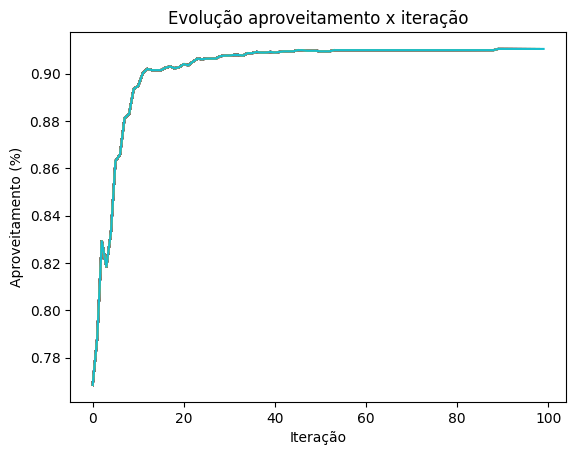

In [ ]:
sol = enxame_particulas(20, 100, coef_cognitivo=c1, coef_social=c2, inercia=w, mostrar_dados=True, mostrar_grafico=True)